In [0]:
!pip install -U -q PyDrive
!pip install -U -q sqlalchemy
!pip install -U -q sklearn

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

!cp '/content/gdrive/My Drive/met_AURORA' aurora-base

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import csv
from itertools import islice
import numpy as np
import sqlalchemy
import glob
from sqlalchemy import Column, Integer, String
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
import pickle
from datetime import datetime
import lzma
import os
import time
import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


#database = "/content/aurora-base"

Base = declarative_base()
engine = create_engine('sqlite:////content/aurora-base', echo=False)
Session = sessionmaker(bind=engine)
session = Session()

class frame(Base):
    __tablename__ = 'frame'
    id = Column(Integer, primary_key=True, index=True)
    name = Column(String)
    start = Column(Integer,index=True)
    end = Column(Integer)
    lat = Column(Integer,index=True)
    lon = Column(Integer,index=True)
    height = Column(Integer,index=True)
    def __init__(self,id, name, start, end, lat, lon, height):
        self.id = id
        self.name = name
        self.start = start
        self.end = end
        self.lat = lat
        self.lon = lon
        self.height = height

class data_table(Base):
    __tablename__ = 'data'
    id = Column(Integer, primary_key=True, index=True)
    data = Column(sqlalchemy.types.BLOB)
    def __init__(self, id, data):
        self.id = id
        self.data = data

class hv_line(Base):
    __tablename__ = 'hv_line'
    id = Column(Integer, primary_key=True, index=True)
    hv1 = Column(Integer, index=True)
    hv2 = Column(Integer, index=True)
    hv3 = Column(Integer, index=True)
    hv4 = Column(Integer, index=True)
    hv5 = Column(Integer, index=True)
    hv6 = Column(Integer, index=True)
    hv7 = Column(Integer, index=True)
    hv8 = Column(Integer, index=True)
    hv9 = Column(Integer, index=True)
    hv10 = Column(Integer, index=True)
    hv11 = Column(Integer, index=True)
    hv12 = Column(Integer, index=True)
    hv13 = Column(Integer, index=True)
    hv14 = Column(Integer, index=True)
    hv15 = Column(Integer, index=True)
    hv16 = Column(Integer, index=True)
    hv17 = Column(Integer, index=True)
    hv18 = Column(Integer, index=True)
    hv19 = Column(Integer, index=True)
    hv20 = Column(Integer, index=True)
    hv21 = Column(Integer, index=True)
    hv22 = Column(Integer, index=True)
    hv23 = Column(Integer, index=True)
    hv24 = Column(Integer, index=True)
    hv25 = Column(Integer, index=True)
    hv26 = Column(Integer, index=True)
    hv27 = Column(Integer, index=True)
    hv28 = Column(Integer, index=True)
    hv29 = Column(Integer, index=True)
    hv30 = Column(Integer, index=True)
    hv31 = Column(Integer, index=True)
    hv32 = Column(Integer, index=True)

    list_hv = [hv1,hv2,hv3,hv4,hv5,hv6,hv7,hv8,hv9,hv10,hv11,hv12,hv13,hv14,hv15,hv16,hv17,hv18,hv19,hv20,hv21,hv22,hv23,hv24,hv25,hv26,hv27,hv28,hv29,hv30,hv31,hv32]


    def __init__(self, id, list_in):
        self.id = id
        self.hv1 = list_in[0]
        self.hv2 = list_in[1]
        self.hv3 = list_in[2]
        self.hv4 = list_in[3]
        self.hv5 = list_in[4]
        self.hv6 = list_in[5]
        self.hv7 = list_in[6]
        self.hv8 = list_in[7]
        self.hv9 = list_in[8]
        self.hv10 = list_in[9]
        self.hv11 = list_in[10]
        self.hv12 = list_in[11]
        self.hv13 = list_in[12]
        self.hv14 = list_in[13]
        self.hv15 = list_in[14]
        self.hv16 = list_in[15]
        self.hv17 = list_in[16]
        self.hv18 = list_in[17]
        self.hv19 = list_in[18]
        self.hv20 = list_in[19]
        self.hv21 = list_in[20]
        self.hv22 = list_in[21]
        self.hv23 = list_in[22]
        self.hv24 = list_in[23]
        self.hv25 = list_in[24]
        self.hv26 = list_in[25]
        self.hv27 = list_in[26]
        self.hv28 = list_in[27]
        self.hv29 = list_in[28]
        self.hv30 = list_in[29]
        self.hv31 = list_in[30]
        self.hv32 = list_in[31]


def hv_get_list(id):
    hv_now = session.query(hv_line).get(id)
    return [hv_now.hv1,hv_now.hv2,hv_now.hv3,hv_now.hv4,hv_now.hv5,hv_now.hv6,hv_now.hv7,hv_now.hv8,hv_now.hv9,hv_now.hv10,hv_now.hv11,hv_now.hv12,hv_now.hv13,hv_now.hv14,hv_now.hv15,hv_now.hv16,hv_now.hv17,hv_now.hv18,hv_now.hv19,hv_now.hv20,hv_now.hv21,hv_now.hv22,hv_now.hv23,hv_now.hv24,hv_now.hv25,hv_now.hv26,hv_now.hv27,hv_now.hv28,hv_now.hv29,hv_now.hv30,hv_now.hv31,hv_now.hv32]



#Подсчитаем кол воd
print(session.query(frame).count())

def loading_data():
    x = []
    for id in range(session.query(frame).count()):
        k = 0
        #print(id,session.query(frame).get(id).name)
        #print(hv_get_list(id))
        j = 0
        while (j < 32):
          if ((hv_get_list(id)[j]) - 9216 > 200) & ((hv_get_list(id)[j+1]) - 8192 > 200):
                k+=1
          j+=2
        if (k > 9):
          #print(id, session.query(frame).get(id).name)
          #print(hv_get_list(id))
          #print(pickle.loads(session.query(data_table).get(id).data))
          y = pickle.loads(session.query(data_table).get(id).data)
          y = np.asarray(y)
          x.append(y)

    y = np.asarray(x)
    print(y)
    return y

#loading_data()
def loading_names():
    names = []
    for id in range(session.query(frame).count()):
      k = 0
      j = 0
      while (j < 32):
          if ((hv_get_list(id)[j]) - 9216 > 200) & ((hv_get_list(id)[j+1]) - 8192 > 200):
                k+=1
          j+=2
      if (k > 9):
        names.append(session.query(frame).get(id).name)
      
    return names

1187


In [0]:
for i in range(len(names)):
  if (names[i] == 'osc_eas-171110_163115-171110_133118-838.txt'):
    print(i)

286


In [0]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



# Array loading
a = loading_data()
print(len(a))
names = loading_names()
# 4d to 2d
y = np.reshape(a,(len(a),-1))
X = y
X = StandardScaler().fit_transform(X)



[[[[ 0.000e+00  5.100e+02  1.132e+03 ...  1.280e+03  0.000e+00
     0.000e+00]
   [ 8.400e+01  0.000e+00  8.300e+01 ...  1.600e+01  1.900e+01
     2.320e+02]
   [ 3.300e+02  6.150e+02  4.120e+02 ...  6.330e+02  5.470e+02
     5.160e+02]
   ...
   [ 7.700e+02  1.149e+03  1.467e+03 ...  6.700e+02  7.310e+02
     6.700e+02]
   [-1.000e+00 -1.000e+00 -1.000e+00 ... -1.000e+00 -1.000e+00
    -1.000e+00]
   [ 3.990e+02  4.280e+02  5.440e+02 ...  4.770e+02  6.480e+02
     0.000e+00]]

  [[ 0.000e+00  5.050e+02  1.127e+03 ...  1.280e+03  0.000e+00
     0.000e+00]
   [ 8.500e+01  0.000e+00  8.500e+01 ...  1.900e+01  1.800e+01
     2.290e+02]
   [ 3.260e+02  6.140e+02  4.150e+02 ...  6.310e+02  5.460e+02
     5.180e+02]
   ...
   [ 7.670e+02  1.152e+03  1.448e+03 ...  6.720e+02  7.210e+02
     6.710e+02]
   [-1.000e+00 -1.000e+00 -1.000e+00 ... -1.000e+00 -1.000e+00
    -1.000e+00]
   [ 4.020e+02  4.290e+02  5.430e+02 ...  4.740e+02  6.420e+02
     0.000e+00]]

  [[ 0.000e+00  5.030e+02  1.124e+

In [0]:
print(len(names))

918


In [0]:

# Compute DBSCAN
db = DBSCAN(eps=43, min_samples=3).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print(pd.Series(labels).value_counts())

g = {}

print('noise')
print('----------------')
for i in range(len(labels)):
  if (labels[i] == -1):
    print(names[i])
    print(i)

for i in range(n_clusters_):
    g[i] = []
    for k in range(len(list(labels))):
        if list(labels)[k] == i:
            g[i].append(k)
for cluster in g.keys():
    print("Cluster",cluster)
    print("----------------")
    for ind in g[cluster]:
        print (names[ind])


Estimated number of clusters: 8
Estimated number of noise points: 382
 0    446
-1    382
 4     28
 2     23
 3     11
 1     11
 6      9
 5      5
 7      3
dtype: int64
noise
----------------
osc_eas-171111_015557-171110_225606-212.txt
1
osc_eas-170105_211303-170105_181310-503.txt
4
osc_eas-170104_134822-170104_104838-175.txt
6
osc_eas-171112_184444-171112_154457-798.txt
8
osc_eas-171110_035817-171110_005817-287.txt
9
osc_eas-170101_023834-161231_233842-687.txt
10
osc_eas-170107_012958-170106_222957-052.txt
12
osc_eas-170105_035952-170105_005952-270.txt
14
osc_eas-170109_144434-170109_114434-200.txt
16
osc_eas-171111_190933-171111_160932-979.txt
17
osc_eas-161231_123207-161231_093256-059.txt
19
osc_eas-170105_211611-170105_181622-506.txt
21
osc_eas-170106_235140-170106_205206-660.txt
24
osc_eas-171108_220803-171108_190935-644.txt
29
osc_eas-170108_212906-170108_182932-458.txt
30
osc_eas-170107_061330-170107_031349-276.txt
31
osc_eas-170108_023655-170107_233912-203.txt
32
osc_eas-17

In [0]:
g

In [0]:
a1 = []
names1 = []
for i in range (len(a)):
  if (labels[i] == -1):
    a1.append(a[i])
    names1.append(names[i])
a1 = np.asarray(a1)
print(len(a1))

382


In [0]:
for i in range(len(names1)):
  if (names1[i] == 'osc_eas-171110_163115-171110_133118-838.txt'):
    print(i)

122


In [0]:
array_of_axes = []
time = 0
for index1 in range (256):
    array_of_axes.append(time)
    time += 0.0064


def counting(count1, count2):
  c = []
  num_event = 170
  num_module = count2
  num_element = count1
  for i in range(256):
      c.append(a2[num_event][i][num_module][num_element])
  return c
#summary = sum(c)
#summary = summary/256
#print(summary)
#print(array_of_axes)
print(names3[43])

osc_eas-171110_163115-171110_133118-838.txt


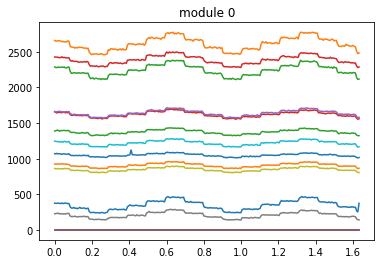

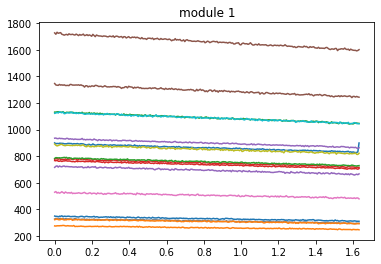

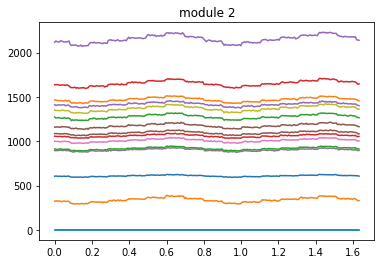

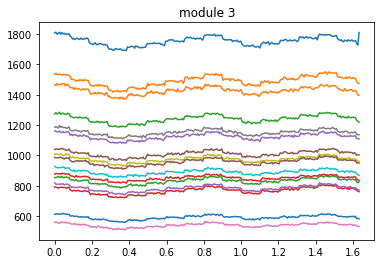

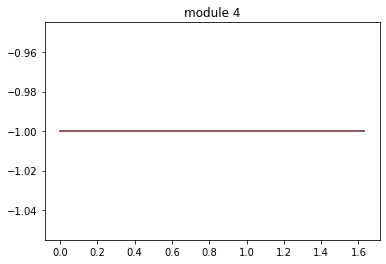

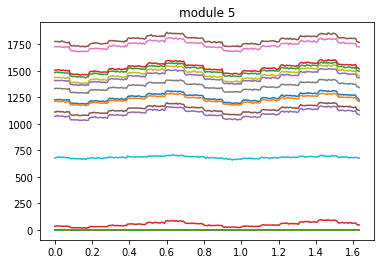

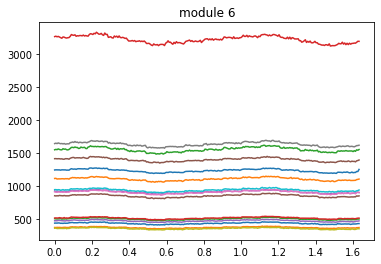

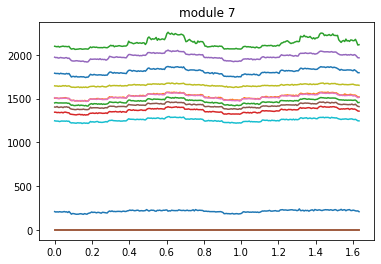

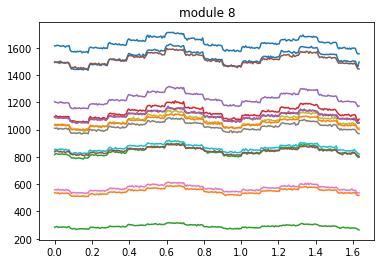

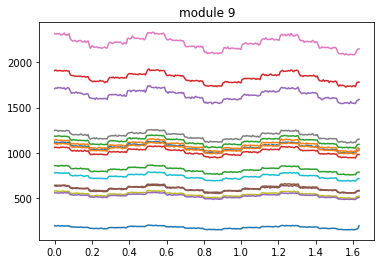

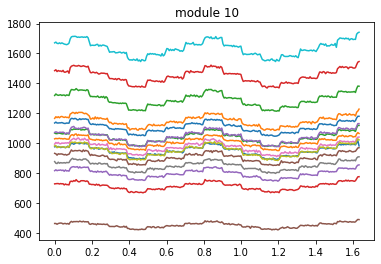

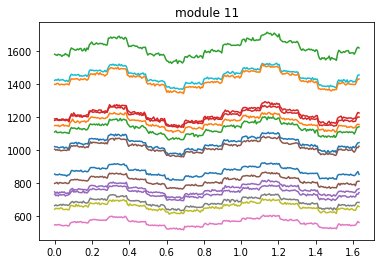

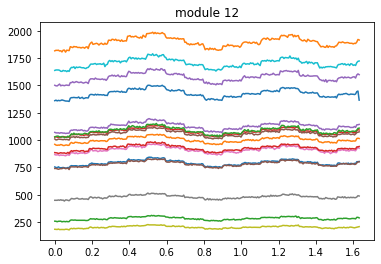

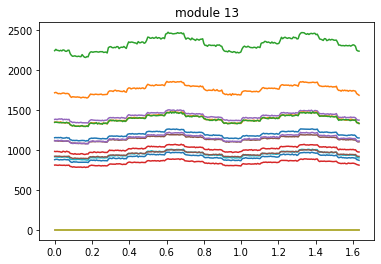

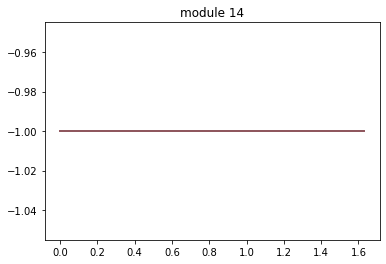

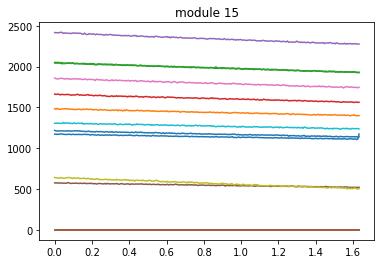

In [0]:

ylist1 = counting(0,0)
ylist2 = counting(1,0)
ylist3 = counting(2,0)
ylist4 = counting(3,0)
ylist5 = counting(4,0)
ylist6 = counting(5,0)
ylist7 = counting(6,0)
ylist8 = counting(7,0)
ylist9 = counting(8,0)
ylist10 = counting(9,0)
ylist11 = counting(10,0)
ylist12 = counting(11,0)
ylist13 = counting(12,0)
ylist14 = counting(13,0)
ylist15 = counting(14,0)
ylist16 = counting(15,0)

xlist1 = array_of_axes
xlist2 = array_of_axes
xlist3 = array_of_axes
xlist4 = array_of_axes
xlist5 = array_of_axes
xlist6 = array_of_axes
xlist7 = array_of_axes
xlist8 = array_of_axes
xlist9 = array_of_axes
xlist10 = array_of_axes
xlist11 = array_of_axes
xlist12 = array_of_axes
xlist13 = array_of_axes
xlist14 = array_of_axes
xlist15 = array_of_axes
xlist16 = array_of_axes

plt.plot(xlist1, ylist1)
plt.plot(xlist2, ylist2)
plt.plot(xlist3, ylist3)
plt.plot(xlist4, ylist4)
plt.plot(xlist5, ylist5)
plt.plot(xlist6, ylist6)
plt.plot(xlist7, ylist7)
plt.plot(xlist8, ylist8)
plt.plot(xlist9, ylist9)
plt.plot(xlist10, ylist10)
plt.plot(xlist11, ylist11)
plt.plot(xlist12, ylist12)
plt.plot(xlist13, ylist13)
plt.plot(xlist14, ylist14)
plt.plot(xlist15, ylist15)
plt.plot(xlist16, ylist16)

plt.title('module 0')
plt.show()

ylist1 = counting(0,1)
ylist2 = counting(1,1)
ylist3 = counting(2,1)
ylist4 = counting(3,1)
ylist5 = counting(4,1)
ylist6 = counting(5,1)
ylist7 = counting(6,1)
ylist8 = counting(7,1)
ylist9 = counting(8,1)
ylist10 = counting(9,1)
ylist11 = counting(10,1)
ylist12 = counting(11,1)
ylist13 = counting(12,1)
ylist14 = counting(13,1)
ylist15 = counting(14,1)
ylist16 = counting(15,1)

plt.plot(xlist1, ylist1)
plt.plot(xlist2, ylist2)
plt.plot(xlist3, ylist3)
plt.plot(xlist4, ylist4)
plt.plot(xlist5, ylist5)
plt.plot(xlist6, ylist6)
plt.plot(xlist7, ylist7)
plt.plot(xlist8, ylist8)
plt.plot(xlist9, ylist9)
plt.plot(xlist10, ylist10)
plt.plot(xlist11, ylist11)
plt.plot(xlist12, ylist12)
plt.plot(xlist13, ylist13)
plt.plot(xlist14, ylist14)
plt.plot(xlist15, ylist15)
plt.plot(xlist16, ylist16)

plt.title('module 1')
plt.show()

ylist1 = counting(0,2)
ylist2 = counting(1,2)
ylist3 = counting(2,2)
ylist4 = counting(3,2)
ylist5 = counting(4,2)
ylist6 = counting(5,2)
ylist7 = counting(6,2)
ylist8 = counting(7,2)
ylist9 = counting(8,2)
ylist10 = counting(9,2)
ylist11 = counting(10,2)
ylist12 = counting(11,2)
ylist13 = counting(12,2)
ylist14 = counting(13,2)
ylist15 = counting(14,2)
ylist16 = counting(15,2)

plt.plot(xlist1, ylist1)
plt.plot(xlist2, ylist2)
plt.plot(xlist3, ylist3)
plt.plot(xlist4, ylist4)
plt.plot(xlist5, ylist5)
plt.plot(xlist6, ylist6)
plt.plot(xlist7, ylist7)
plt.plot(xlist8, ylist8)
plt.plot(xlist9, ylist9)
plt.plot(xlist10, ylist10)
plt.plot(xlist11, ylist11)
plt.plot(xlist12, ylist12)
plt.plot(xlist13, ylist13)
plt.plot(xlist14, ylist14)
plt.plot(xlist15, ylist15)
plt.plot(xlist16, ylist16)

plt.title('module 2')
plt.show()

ylist1 = counting(0,3)
ylist2 = counting(1,3)
ylist3 = counting(2,3)
ylist4 = counting(3,3)
ylist5 = counting(4,3)
ylist6 = counting(5,3)
ylist7 = counting(6,3)
ylist8 = counting(7,3)
ylist9 = counting(8,3)
ylist10 = counting(9,3)
ylist11 = counting(10,3)
ylist12 = counting(11,3)
ylist13 = counting(12,3)
ylist14 = counting(13,3)
ylist15 = counting(14,3)
ylist16 = counting(15,3)

plt.plot(xlist1, ylist1)
plt.plot(xlist2, ylist2)
plt.plot(xlist3, ylist3)
plt.plot(xlist4, ylist4)
plt.plot(xlist5, ylist5)
plt.plot(xlist6, ylist6)
plt.plot(xlist7, ylist7)
plt.plot(xlist8, ylist8)
plt.plot(xlist9, ylist9)
plt.plot(xlist10, ylist10)
plt.plot(xlist11, ylist11)
plt.plot(xlist12, ylist12)
plt.plot(xlist13, ylist13)
plt.plot(xlist14, ylist14)
plt.plot(xlist15, ylist15)
plt.plot(xlist16, ylist16)

plt.title('module 3')
plt.show()

ylist1 = counting(0,4)
ylist2 = counting(1,4)
ylist3 = counting(2,4)
ylist4 = counting(3,4)
ylist5 = counting(4,4)
ylist6 = counting(5,4)
ylist7 = counting(6,4)
ylist8 = counting(7,4)
ylist9 = counting(8,4)
ylist10 = counting(9,4)
ylist11 = counting(10,4)
ylist12 = counting(11,4)
ylist13 = counting(12,4)
ylist14 = counting(13,4)
ylist15 = counting(14,4)
ylist16 = counting(15,4)

plt.plot(xlist1, ylist1)
plt.plot(xlist2, ylist2)
plt.plot(xlist3, ylist3)
plt.plot(xlist4, ylist4)
plt.plot(xlist5, ylist5)
plt.plot(xlist6, ylist6)
plt.plot(xlist7, ylist7)
plt.plot(xlist8, ylist8)
plt.plot(xlist9, ylist9)
plt.plot(xlist10, ylist10)
plt.plot(xlist11, ylist11)
plt.plot(xlist12, ylist12)
plt.plot(xlist13, ylist13)
plt.plot(xlist14, ylist14)
plt.plot(xlist15, ylist15)
plt.plot(xlist16, ylist16)

plt.title('module 4')
plt.show()

ylist1 = counting(0,5)
ylist2 = counting(1,5)
ylist3 = counting(2,5)
ylist4 = counting(3,5)
ylist5 = counting(4,5)
ylist6 = counting(5,5)
ylist7 = counting(6,5)
ylist8 = counting(7,5)
ylist9 = counting(8,5)
ylist10 = counting(9,5)
ylist11 = counting(10,5)
ylist12 = counting(11,5)
ylist13 = counting(12,5)
ylist14 = counting(13,5)
ylist15 = counting(14,5)
ylist16 = counting(15,5)

plt.plot(xlist1, ylist1)
plt.plot(xlist2, ylist2)
plt.plot(xlist3, ylist3)
plt.plot(xlist4, ylist4)
plt.plot(xlist5, ylist5)
plt.plot(xlist6, ylist6)
plt.plot(xlist7, ylist7)
plt.plot(xlist8, ylist8)
plt.plot(xlist9, ylist9)
plt.plot(xlist10, ylist10)
plt.plot(xlist11, ylist11)
plt.plot(xlist12, ylist12)
plt.plot(xlist13, ylist13)
plt.plot(xlist14, ylist14)
plt.plot(xlist15, ylist15)
plt.plot(xlist16, ylist16)

plt.title('module 5')
plt.show()

ylist1 = counting(0,6)
ylist2 = counting(1,6)
ylist3 = counting(2,6)
ylist4 = counting(3,6)
ylist5 = counting(4,6)
ylist6 = counting(5,6)
ylist7 = counting(6,6)
ylist8 = counting(7,6)
ylist9 = counting(8,6)
ylist10 = counting(9,6)
ylist11 = counting(10,6)
ylist12 = counting(11,6)
ylist13 = counting(12,6)
ylist14 = counting(13,6)
ylist15 = counting(14,6)
ylist16 = counting(15,6)

plt.plot(xlist1, ylist1)
plt.plot(xlist2, ylist2)
plt.plot(xlist3, ylist3)
plt.plot(xlist4, ylist4)
plt.plot(xlist5, ylist5)
plt.plot(xlist6, ylist6)
plt.plot(xlist7, ylist7)
plt.plot(xlist8, ylist8)
plt.plot(xlist9, ylist9)
plt.plot(xlist10, ylist10)
plt.plot(xlist11, ylist11)
plt.plot(xlist12, ylist12)
plt.plot(xlist13, ylist13)
plt.plot(xlist14, ylist14)
plt.plot(xlist15, ylist15)
plt.plot(xlist16, ylist16)

plt.title('module 6')
plt.show()

ylist1 = counting(0,7)
ylist2 = counting(1,7)
ylist3 = counting(2,7)
ylist4 = counting(3,7)
ylist5 = counting(4,7)
ylist6 = counting(5,7)
ylist7 = counting(6,7)
ylist8 = counting(7,7)
ylist9 = counting(8,7)
ylist10 = counting(9,7)
ylist11 = counting(10,7)
ylist12 = counting(11,7)
ylist13 = counting(12,7)
ylist14 = counting(13,7)
ylist15 = counting(14,7)
ylist16 = counting(15,7)

plt.plot(xlist1, ylist1)
plt.plot(xlist2, ylist2)
plt.plot(xlist3, ylist3)
plt.plot(xlist4, ylist4)
plt.plot(xlist5, ylist5)
plt.plot(xlist6, ylist6)
plt.plot(xlist7, ylist7)
plt.plot(xlist8, ylist8)
plt.plot(xlist9, ylist9)
plt.plot(xlist10, ylist10)
plt.plot(xlist11, ylist11)
plt.plot(xlist12, ylist12)
plt.plot(xlist13, ylist13)
plt.plot(xlist14, ylist14)
plt.plot(xlist15, ylist15)
plt.plot(xlist16, ylist16)

plt.title('module 7')
plt.show()

ylist1 = counting(0,8)
ylist2 = counting(1,8)
ylist3 = counting(2,8)
ylist4 = counting(3,8)
ylist5 = counting(4,8)
ylist6 = counting(5,8)
ylist7 = counting(6,8)
ylist8 = counting(7,8)
ylist9 = counting(8,8)
ylist10 = counting(9,8)
ylist11 = counting(10,8)
ylist12 = counting(11,8)
ylist13 = counting(12,8)
ylist14 = counting(13,8)
ylist15 = counting(14,8)
ylist16 = counting(15,8)

plt.plot(xlist1, ylist1)
plt.plot(xlist2, ylist2)
plt.plot(xlist3, ylist3)
plt.plot(xlist4, ylist4)
plt.plot(xlist5, ylist5)
plt.plot(xlist6, ylist6)
plt.plot(xlist7, ylist7)
plt.plot(xlist8, ylist8)
plt.plot(xlist9, ylist9)
plt.plot(xlist10, ylist10)
plt.plot(xlist11, ylist11)
plt.plot(xlist12, ylist12)
plt.plot(xlist13, ylist13)
plt.plot(xlist14, ylist14)
plt.plot(xlist15, ylist15)
plt.plot(xlist16, ylist16)

plt.title('module 8')
plt.show()

ylist1 = counting(0,9)
ylist2 = counting(1,9)
ylist3 = counting(2,9)
ylist4 = counting(3,9)
ylist5 = counting(4,9)
ylist6 = counting(5,9)
ylist7 = counting(6,9)
ylist8 = counting(7,9)
ylist9 = counting(8,9)
ylist10 = counting(9,9)
ylist11 = counting(10,9)
ylist12 = counting(11,9)
ylist13 = counting(12,9)
ylist14 = counting(13,9)
ylist15 = counting(14,9)
ylist16 = counting(15,9)

plt.plot(xlist1, ylist1)
plt.plot(xlist2, ylist2)
plt.plot(xlist3, ylist3)
plt.plot(xlist4, ylist4)
plt.plot(xlist5, ylist5)
plt.plot(xlist6, ylist6)
plt.plot(xlist7, ylist7)
plt.plot(xlist8, ylist8)
plt.plot(xlist9, ylist9)
plt.plot(xlist10, ylist10)
plt.plot(xlist11, ylist11)
plt.plot(xlist12, ylist12)
plt.plot(xlist13, ylist13)
plt.plot(xlist14, ylist14)
plt.plot(xlist15, ylist15)
plt.plot(xlist16, ylist16)

plt.title('module 9')
plt.show()

ylist1 = counting(0,10)
ylist2 = counting(1,10)
ylist3 = counting(2,10)
ylist4 = counting(3,10)
ylist5 = counting(4,10)
ylist6 = counting(5,10)
ylist7 = counting(6,10)
ylist8 = counting(7,10)
ylist9 = counting(8,10)
ylist10 = counting(9,10)
ylist11 = counting(10,10)
ylist12 = counting(11,10)
ylist13 = counting(12,10)
ylist14 = counting(13,10)
ylist15 = counting(14,10)
ylist16 = counting(15,10)

plt.plot(xlist1, ylist1)
plt.plot(xlist2, ylist2)
plt.plot(xlist3, ylist3)
plt.plot(xlist4, ylist4)
plt.plot(xlist5, ylist5)
plt.plot(xlist6, ylist6)
plt.plot(xlist7, ylist7)
plt.plot(xlist8, ylist8)
plt.plot(xlist9, ylist9)
plt.plot(xlist10, ylist10)
plt.plot(xlist11, ylist11)
plt.plot(xlist12, ylist12)
plt.plot(xlist13, ylist13)
plt.plot(xlist14, ylist14)
plt.plot(xlist15, ylist15)
plt.plot(xlist16, ylist16)

plt.title('module 10')
plt.show()

ylist1 = counting(0,11)
ylist2 = counting(1,11)
ylist3 = counting(2,11)
ylist4 = counting(3,11)
ylist5 = counting(4,11)
ylist6 = counting(5,11)
ylist7 = counting(6,11)
ylist8 = counting(7,11)
ylist9 = counting(8,11)
ylist10 = counting(9,11)
ylist11 = counting(10,11)
ylist12 = counting(11,11)
ylist13 = counting(12,11)
ylist14 = counting(13,11)
ylist15 = counting(14,11)
ylist16 = counting(15,11)

plt.plot(xlist1, ylist1)
plt.plot(xlist2, ylist2)
plt.plot(xlist3, ylist3)
plt.plot(xlist4, ylist4)
plt.plot(xlist5, ylist5)
plt.plot(xlist6, ylist6)
plt.plot(xlist7, ylist7)
plt.plot(xlist8, ylist8)
plt.plot(xlist9, ylist9)
plt.plot(xlist10, ylist10)
plt.plot(xlist11, ylist11)
plt.plot(xlist12, ylist12)
plt.plot(xlist13, ylist13)
plt.plot(xlist14, ylist14)
plt.plot(xlist15, ylist15)
plt.plot(xlist16, ylist16)

plt.title('module 11')
plt.show()

ylist1 = counting(0,12)
ylist2 = counting(1,12)
ylist3 = counting(2,12)
ylist4 = counting(3,12)
ylist5 = counting(4,12)
ylist6 = counting(5,12)
ylist7 = counting(6,12)
ylist8 = counting(7,12)
ylist9 = counting(8,12)
ylist10 = counting(9,12)
ylist11 = counting(10,12)
ylist12 = counting(11,12)
ylist13 = counting(12,12)
ylist14 = counting(13,12)
ylist15 = counting(14,12)
ylist16 = counting(15,12)

plt.plot(xlist1, ylist1)
plt.plot(xlist2, ylist2)
plt.plot(xlist3, ylist3)
plt.plot(xlist4, ylist4)
plt.plot(xlist5, ylist5)
plt.plot(xlist6, ylist6)
plt.plot(xlist7, ylist7)
plt.plot(xlist8, ylist8)
plt.plot(xlist9, ylist9)
plt.plot(xlist10, ylist10)
plt.plot(xlist11, ylist11)
plt.plot(xlist12, ylist12)
plt.plot(xlist13, ylist13)
plt.plot(xlist14, ylist14)
plt.plot(xlist15, ylist15)
plt.plot(xlist16, ylist16)

plt.title('module 12')
plt.show()

ylist1 = counting(0,13)
ylist2 = counting(1,13)
ylist3 = counting(2,13)
ylist4 = counting(3,13)
ylist5 = counting(4,13)
ylist6 = counting(5,13)
ylist7 = counting(6,13)
ylist8 = counting(7,13)
ylist9 = counting(8,13)
ylist10 = counting(9,13)
ylist11 = counting(10,13)
ylist12 = counting(11,13)
ylist13 = counting(12,13)
ylist14 = counting(13,13)
ylist15 = counting(14,13)
ylist16 = counting(15,13)

plt.plot(xlist1, ylist1)
plt.plot(xlist2, ylist2)
plt.plot(xlist3, ylist3)
plt.plot(xlist4, ylist4)
plt.plot(xlist5, ylist5)
plt.plot(xlist6, ylist6)
plt.plot(xlist7, ylist7)
plt.plot(xlist8, ylist8)
plt.plot(xlist9, ylist9)
plt.plot(xlist10, ylist10)
plt.plot(xlist11, ylist11)
plt.plot(xlist12, ylist12)
plt.plot(xlist13, ylist13)
plt.plot(xlist14, ylist14)
plt.plot(xlist15, ylist15)
plt.plot(xlist16, ylist16)

plt.title('module 13')
plt.show()

ylist1 = counting(0,14)
ylist2 = counting(1,14)
ylist3 = counting(2,14)
ylist4 = counting(3,14)
ylist5 = counting(4,14)
ylist6 = counting(5,14)
ylist7 = counting(6,14)
ylist8 = counting(7,14)
ylist9 = counting(8,14)
ylist10 = counting(9,14)
ylist11 = counting(10,14)
ylist12 = counting(11,14)
ylist13 = counting(12,14)
ylist14 = counting(13,14)
ylist15 = counting(14,14)
ylist16 = counting(15,14)

plt.plot(xlist1, ylist1)
plt.plot(xlist2, ylist2)
plt.plot(xlist3, ylist3)
plt.plot(xlist4, ylist4)
plt.plot(xlist5, ylist5)
plt.plot(xlist6, ylist6)
plt.plot(xlist7, ylist7)
plt.plot(xlist8, ylist8)
plt.plot(xlist9, ylist9)
plt.plot(xlist10, ylist10)
plt.plot(xlist11, ylist11)
plt.plot(xlist12, ylist12)
plt.plot(xlist13, ylist13)
plt.plot(xlist14, ylist14)
plt.plot(xlist15, ylist15)
plt.plot(xlist16, ylist16)

plt.title('module 14')
plt.show()

ylist1 = counting(0,15)
ylist2 = counting(1,15)
ylist3 = counting(2,15)
ylist4 = counting(3,15)
ylist5 = counting(4,15)
ylist6 = counting(5,15)
ylist7 = counting(6,15)
ylist8 = counting(7,15)
ylist9 = counting(8,15)
ylist10 = counting(9,15)
ylist11 = counting(10,15)
ylist12 = counting(11,15)
ylist13 = counting(12,15)
ylist14 = counting(13,15)
ylist15 = counting(14,15)
ylist16 = counting(15,15)

plt.plot(xlist1, ylist1)
plt.plot(xlist2, ylist2)
plt.plot(xlist3, ylist3)
plt.plot(xlist4, ylist4)
plt.plot(xlist5, ylist5)
plt.plot(xlist6, ylist6)
plt.plot(xlist7, ylist7)
plt.plot(xlist8, ylist8)
plt.plot(xlist9, ylist9)
plt.plot(xlist10, ylist10)
plt.plot(xlist11, ylist11)
plt.plot(xlist12, ylist12)
plt.plot(xlist13, ylist13)
plt.plot(xlist14, ylist14)
plt.plot(xlist15, ylist15)
plt.plot(xlist16, ylist16)

plt.title('module 15')
plt.show()

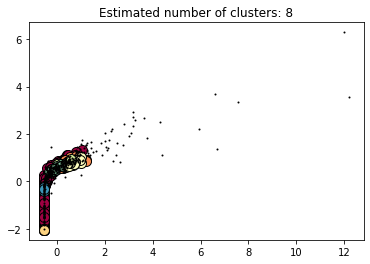

In [0]:

#print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
#print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
#print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
#print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
#print("Adjusted Mutual Information: %0.3f"% metrics.adjusted_mutual_info_score(labels_true, labels))
#print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))


# Plot result 1


# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=1)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [0]:

# 4d to 2d
y1 = np.reshape(a1,(len(a1),-1))
X1 = y1
X1 = StandardScaler().fit_transform(X1)

# Compute DBSCAN
db = DBSCAN(eps=84, min_samples=4).fit(X1)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels1 = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_1 = len(set(labels1)) - (1 if -1 in labels1 else 0)
n_noise_1 = list(labels1).count(-1)
print('Estimated number of clusters: %d' % n_clusters_1)
print('Estimated number of noise points: %d' % n_noise_1)
print(pd.Series(labels1).value_counts())

g1 = {}

print('noise')
print('----------------')
for i in range(len(labels1)):
  if (labels1[i] == -1):
    print(names1[i])
    print(i)

for i in range(n_clusters_1):
    g1[i] = []
    for k in range(len(list(labels1))):
        if list(labels1)[k] == i:
            g1[i].append(k)
for cluster in g1.keys():
    print("Cluster",cluster)
    print("----------------")
    for ind in g1[cluster]:
        print (names1[ind])


Estimated number of clusters: 2
Estimated number of noise points: 194
-1    194
 0    171
 1     17
dtype: int64
noise
----------------
osc_eas-170104_134822-170104_104838-175.txt
2
osc_eas-171112_184444-171112_154457-798.txt
3
osc_eas-170105_035952-170105_005952-270.txt
7
osc_eas-170109_144434-170109_114434-200.txt
8
osc_eas-171111_190933-171111_160932-979.txt
9
osc_eas-170103_234249-170103_204249-052.txt
17
osc_eas-171112_140010-171112_110017-591.txt
18
osc_eas-170103_221154-170103_191155-450.txt
19
osc_eas-170106_190917-170106_160941-445.txt
20
osc_eas-170304_073257-170304_043301-270.txt
23
osc_eas-161230_222607-161230_192608-573.txt
24
osc_eas-170101_211526-170101_182629-501.txt
27
osc_eas-171109_152504-171109_122517-1449.txt
30
osc_eas-170314_043423-170314_013423-250.txt
32
osc_eas-170104_011725-170103_221725-129.txt
33
osc_eas-170104_042448-170104_012505-267.txt
38
osc_eas-161231_105849-161231_075851-472.txt
39
osc_eas-170103_203541-170103_173541-384.txt
40
osc_eas-171111_160112-

эпсилон 75, 10 кластеров, шума 391

чем выше эпсилон, начиная с 50, тем меньше шума отсеивается. при 120 только 2 кластера

In [0]:
g1

при эпсилон 55 получаем 6 кластеров. 525 выбросов. скинула кластеры павлу

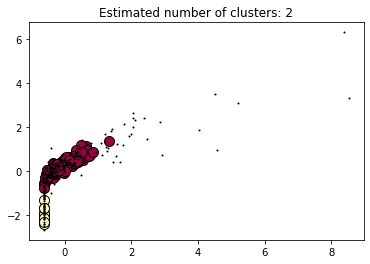

In [0]:
# Plot result 2


# Black removed and is used for noise instead.
unique_labels = set(labels1)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels1 == k)

    xy = X1[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10)

    xy = X1[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=1)

plt.title('Estimated number of clusters: %d' % n_clusters_1)
plt.show()

In [0]:
a2 = []
names2 = []
for i in range (len(a1)):
  if (labels1[i] == -1):
    a2.append(a[i])
    names2.append(names1[i])
a2 = np.asarray(a2)
print(len(a2))

194


In [0]:
for i in range(len(names2)):
  if (names2[i] == 'osc_eas-171110_163115-171110_133118-838.txt'):
    print(i)

54


In [0]:
# 4d to 2d
y2 = np.reshape(a2,(len(a2),-1))
X2 = y2
X2 = StandardScaler().fit_transform(X2)

# Compute DBSCAN
db = DBSCAN(eps=44, min_samples=3).fit(X2)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels2 = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_2 = len(set(labels2)) - (1 if -1 in labels2 else 0)
n_noise_2 = list(labels2).count(-1)
print('Estimated number of clusters: %d' % n_clusters_2)
print('Estimated number of noise points: %d' % n_noise_2)
print(pd.Series(labels2).value_counts())

g2 = {}

print('noise')
print('----------------')
for i in range(len(labels2)):
  if (labels2[i] == -1):
    print(names2[i])

for i in range(n_clusters_2):
    g2[i] = []
    for k in range(len(list(labels2))):
        if list(labels2)[k] == i:
            g2[i].append(k)
for cluster in g2.keys():
    print("Cluster",cluster)
    print("----------------")
    for ind in g2[cluster]:
        print (names2[ind])


Estimated number of clusters: 7
Estimated number of noise points: 109
-1    109
 0     60
 2      7
 6      5
 4      4
 1      3
 5      3
 3      3
dtype: int64
noise
----------------
osc_eas-170109_144434-170109_114434-200.txt
osc_eas-171111_190933-171111_160932-979.txt
osc_eas-170103_234249-170103_204249-052.txt
osc_eas-171112_140010-171112_110017-591.txt
osc_eas-170103_221154-170103_191155-450.txt
osc_eas-170304_073257-170304_043301-270.txt
osc_eas-161230_222607-161230_192608-573.txt
osc_eas-170101_211526-170101_182629-501.txt
osc_eas-171109_152504-171109_122517-1449.txt
osc_eas-170314_043423-170314_013423-250.txt
osc_eas-170104_011725-170103_221725-129.txt
osc_eas-161231_105849-161231_075851-472.txt
osc_eas-170103_203541-170103_173541-384.txt
osc_eas-170102_100444-170102_070504-529.txt
osc_eas-170102_002433-170101_213458-123.txt
osc_eas-170103_124454-170103_094457-055.txt
osc_eas-170105_224632-170105_194656-051.txt
osc_eas-170108_041327-170108_011335-278.txt
osc_eas-171109_025059

In [0]:
g2

{0: [0,
  1,
  2,
  15,
  18,
  22,
  29,
  37,
  40,
  43,
  45,
  49,
  51,
  54,
  61,
  62,
  64,
  71,
  76,
  78,
  79,
  83,
  85,
  89,
  90,
  91,
  93,
  96,
  97,
  100,
  101,
  103,
  109,
  110,
  111,
  112,
  114,
  116,
  119,
  124,
  134,
  137,
  138,
  139,
  144,
  147,
  150,
  153,
  154,
  157,
  160,
  163,
  165,
  169,
  172,
  175,
  176,
  179,
  189,
  192],
 1: [8, 87, 158],
 2: [19, 26, 32, 58, 117, 125, 148],
 3: [20, 102, 141],
 4: [30, 75, 121, 145],
 5: [35, 115, 193],
 6: [48, 68, 99, 149, 170]}

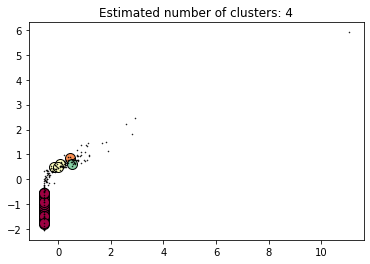

In [0]:
# Plot result 3


# Black removed and is used for noise instead.
unique_labels = set(labels2)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels2 == k)

    xy = X2[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10)

    xy = X2[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=0.5)

plt.title('Estimated number of clusters: %d' % n_clusters_2)
plt.show()

In [0]:
a3 = []
names3 = []
for i in range (len(a2)):
  if (labels2[i] == -1):
    a3.append(a[i])
    names3.append(names2[i])
a3 = np.asarray(a3)
print(len(a3))

152


In [0]:
for i in range(len(names3)):
  if (names3[i] == 'osc_eas-171110_163115-171110_133118-838.txt'):
    print(i)

43


In [0]:
# 4d to 2d
y3 = np.reshape(a3,(len(a3),-1))
X3 = y3
X3 = StandardScaler().fit_transform(X3)

# Compute DBSCAN
db = DBSCAN(eps=44, min_samples=3).fit(X3)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels3 = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_3 = len(set(labels3)) - (1 if -1 in labels3 else 0)
n_noise_3 = list(labels3).count(-1)
print('Estimated number of clusters: %d' % n_clusters_3)
print('Estimated number of noise points: %d' % n_noise_3)
print(pd.Series(labels3).value_counts())

g3 = {}
print('noise')
print('----------------')
for i in range(len(labels3)):
  if (labels3[i] == -1):
    print(names3[i])


for i in range(n_clusters_3):
    g3[i] = []
    for k in range(len(list(labels3))):
        if list(labels3)[k] == i:
            g3[i].append(k)
for cluster in g3.keys():
    print("Cluster",cluster)
    print("----------------")
    for ind in g3[cluster]:
        print (names3[ind])

Estimated number of clusters: 7
Estimated number of noise points: 85
-1    85
 0    41
 5     7
 4     5
 3     4
 2     4
 1     3
 6     3
dtype: int64
noise
----------------
osc_eas-171112_184444-171112_154457-798.txt
osc_eas-171112_140010-171112_110017-591.txt
osc_eas-170304_073257-170304_043301-270.txt
osc_eas-161230_222607-161230_192608-573.txt
osc_eas-171109_152504-171109_122517-1449.txt
osc_eas-170104_011725-170103_221725-129.txt
osc_eas-161231_105849-161231_075851-472.txt
osc_eas-170103_203541-170103_173541-384.txt
osc_eas-170104_073537-170104_043617-411.txt
osc_eas-170102_100444-170102_070504-529.txt
osc_eas-170102_002433-170101_213458-123.txt
osc_eas-170103_124454-170103_094457-055.txt
osc_eas-170108_041327-170108_011335-278.txt
osc_eas-170313_235007-170313_205127-052.txt
osc_eas-170107_061441-170107_031521-277.txt
osc_eas-161231_200823-161231_171857-392.txt
osc_eas-170106_063623-170106_033623-392.txt
osc_eas-170107_215611-170107_185614-588.txt
osc_eas-171108_220537-171108_1

In [0]:
g3

{0: [1,
  5,
  20,
  33,
  34,
  39,
  42,
  44,
  45,
  48,
  58,
  60,
  63,
  64,
  65,
  70,
  72,
  76,
  77,
  85,
  93,
  95,
  98,
  108,
  111,
  112,
  117,
  121,
  122,
  126,
  130,
  132,
  133,
  137,
  139,
  140,
  141,
  143,
  144,
  147,
  148],
 1: [2, 36, 103],
 2: [10, 16, 49, 135],
 3: [12, 29, 86, 105],
 4: [21, 35, 43, 53, 91],
 5: [23, 32, 52, 79, 88, 96],
 6: [3, 8, 78]}

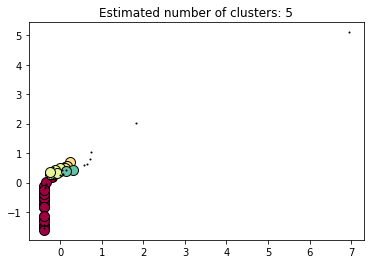

In [0]:
# Plot result 4


# Black removed and is used for noise instead.
unique_labels = set(labels3)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels3 == k)

    xy = X3[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10)

    xy = X3[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=1)

plt.title('Estimated number of clusters: %d' % n_clusters_3)
plt.show()

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
